In [1]:
# Import libraries 
import cv2
from mediapipe.python.solutions import face_detection, face_mesh, drawing_utils
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import mediapipe.framework.formats.landmark_pb2 as mp_landmark

In [17]:
image_path = '/Users/lancelotbosseler/code/labosseler/final-project/final-attention/notebooks/trial-images/multi-faces.jpeg'

In [20]:
def face_coordinates(image_path: str) -> list:                           # output = list of dictionaries of bbox coordinates  
    with face_detection.FaceDetection(
        model_selection=1, min_detection_confidence=0.5) as face_det:
        boxes_list = []
        image_array = cv2.imread(image_path)  
        # Convert the BGR image to RGB and process it with MediaPipe Face Detection.
        image_rgb = cv2.cvtColor(image_array, cv2.COLOR_BGR2RGB)
        results = face_det.process(image_rgb)
        if results.detections: 
            for detection in results.detections: 
                bbox = detection.location_data.relative_bounding_box
                h, w, _ = image_rgb.shape
                x1 = int(bbox.xmin * w) - int(0.05 * int(bbox.xmin * w))
                y1 = int(bbox.ymin * h) - int(0.05 * int(bbox.ymin * h))
                x2 = int((bbox.xmin + bbox.width) * w) + int(0.05 * int(bbox.xmin * w))
                y2 = int((bbox.ymin + bbox.height) * h) + int(0.05 * int(bbox.ymin * h))
                coordinates = {f'x1':x1,f'y1':y1,f'x2':x2,f'y2':y2}
                boxes_list.append(coordinates)
                
    ##TO DO: return list of bbox coordinates 
    return boxes_list

In [23]:
box_coor = face_coordinates(image_path)
box_coor

[{'x1': 162, 'y1': 31, 'x2': 207, 'y2': 62},
 {'x1': 102, 'y1': 75, 'x2': 150, 'y2': 119},
 {'x1': 185, 'y1': 68, 'x2': 243, 'y2': 114},
 {'x1': 129, 'y1': 38, 'x2': 168, 'y2': 67},
 {'x1': 71, 'y1': 41, 'x2': 110, 'y2': 78},
 {'x1': 131, 'y1': 76, 'x2': 177, 'y2': 117},
 {'x1': 34, 'y1': 80, 'x2': 79, 'y2': 131}]

In [36]:
def plot_image_boxes(image, box_coor):
    image_array = cv2.imread(image_path) 
    image_rgb = cv2.cvtColor(image_array, cv2.COLOR_BGR2RGB)
    for bbox in box_coor:
        x1 = bbox["x1"]
        y1 = bbox["y1"]
        x2 = bbox["x2"]
        y2 = bbox["y2"]
        image_annoted = cv2.rectangle(image_rgb, (x1, y1), (x2, y2), (0, 255, 0), 2)
    return plt.imshow(image_annoted)

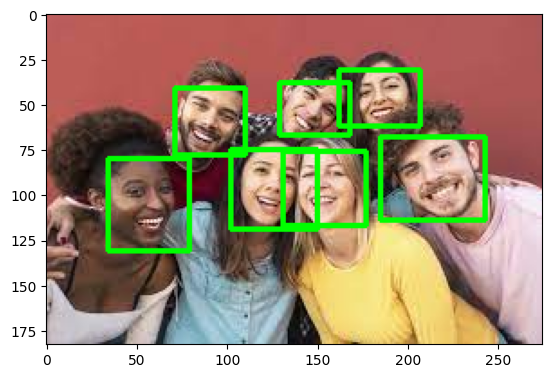

In [37]:
plot_image_boxes(image_path,box_coor)

In [44]:
def crop_faces(image, box_coor):
    faces = []
    image_array = cv2.imread(image_path) 
    image_rgb = cv2.cvtColor(image_array, cv2.COLOR_BGR2RGB)
    for bbox in box_coor:
        x1 = bbox["x1"]
        y1 = bbox["y1"]
        x2 = bbox["x2"]
        y2 = bbox["y2"]
        face = image_rgb[y1:y2, x1:x2]
        faces.append(face)
    
    return faces 
        
        

In [46]:
faces_cropped = crop_faces(image_path, box_coor)

In [57]:
def plot_crop_faces(faces_cropped):
    fig, axs = plt.subplots(1, len(faces_cropped), figsize=(20, 10))
    for i,face in enumerate(faces_cropped):
        axs[i].imshow(face)
    return plt.show()

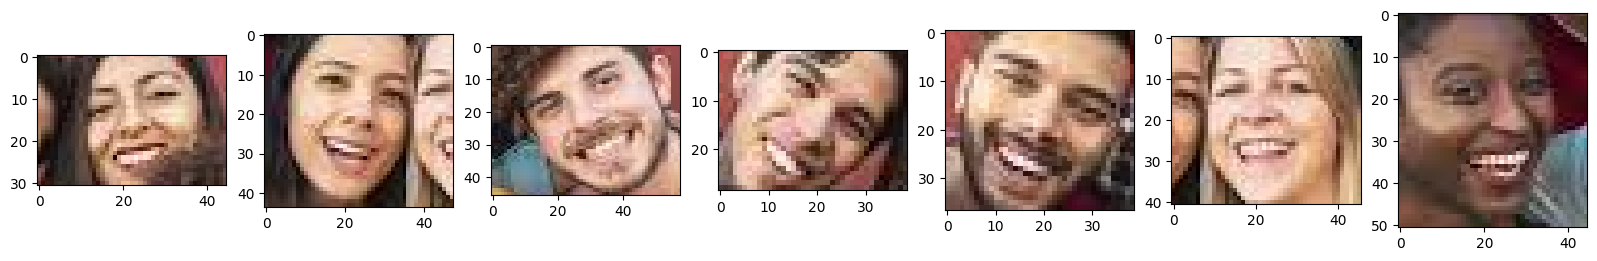

In [58]:
plot_crop_faces(faces_cropped)

In [ ]:
def focntion score 